In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,r2_score,mean_absolute_error,explained_variance_score


In [33]:
data=pd.read_csv('./Co-19 TwitDataset (Apr-Jun 2020).csv')
data.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,pos,sentiment
0,1.250000e+18,19-04-2020,"<a href=""http://twitter.com/download/android"" ...",RT @GlblCtzn: .@priyankachopra is calling on l...,en,0.0,31.0,RJIshak,NaN,"GlblCtzn, priyankachopra",Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.0,0.548,pos
1,1.250000e+18,19-04-2020,"<a href=""http://twitter.com/download/android"" ...",RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,en,0.0,61.0,makinwaoluwole,NaN,OGSG_Official,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.0,0.398,pos
2,1.250000e+18,19-04-2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @AdvoBarryRoux: These 5 police officials ba...,en,0.0,1.0,TembeAmu,NaN,AdvoBarryRoux,NaN,polic offici base namahadi polic station busi ...,0.2732,0.0,0.149,pos
3,1.250000e+18,19-04-2020,"<a href=""http://twitter.com/download/android"" ...",My Condolences to the Family of those who did ...,en,0.0,13869.0,bucketeconomist,Covid_19,NaN,NaN,condol famili surviv,0.0000,0.0,0.000,NaN
4,1.250000e+18,19-04-2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @DrJMZimmerman: I received this text from m...,en,0.0,526.0,rohaniroop,NaN,DrJMZimmerman,"British Columbia, Canada",receiv text year old son work covid19 patient ...,0.0000,0.0,0.000,NaN


In [34]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.drop(columns=['id'],inplace=True)

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8558 entries, 6 to 143897
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       8558 non-null   object 
 1   source           8558 non-null   object 
 2   original_text    8558 non-null   object 
 3   lang             8558 non-null   object 
 4   favorite_count   8558 non-null   float64
 5   retweet_count    8558 non-null   float64
 6   original_author  8558 non-null   object 
 7   hashtags         8558 non-null   object 
 8   user_mentions    8558 non-null   object 
 9   place            8558 non-null   object 
 10  clean_tweet      8558 non-null   object 
 11  compound         8558 non-null   float64
 12  neg              8558 non-null   float64
 13  pos              8558 non-null   float64
 14  sentiment        8558 non-null   object 
dtypes: float64(5), object(10)
memory usage: 1.0+ MB


In [35]:
dt=pd.DataFrame()
dt['text']=data['clean_tweet']
dt["sentiment"]=data["sentiment"]
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8558 entries, 6 to 143897
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       8558 non-null   object
 1   sentiment  8558 non-null   object
dtypes: object(2)
memory usage: 200.6+ KB


In [36]:
dt.head()

,text,sentiment
6,break new york woman symptom die last week pre...,neg
12,prevent key know simpl step take today protect,pos
15,iphrc condemn unrel viciou campaign malign mus...,neg
20,mila launch quarantin wine profit go covid19 r...,pos
21,covid19 alberta doctor slam provinc shoddi mask,neg


In [37]:
x=dt['text']
y=dt["sentiment"]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2)
y_train

20997     pos
93583     pos
58637     pos
63877     pos
18757     pos
         ... 
15441     neg
38589     neg
109948    neg
39484     neg
122969    pos
Name: sentiment, Length: 6846, dtype: object

In [39]:
x_test


111562    watch paramed mexico citi say major ambul call...
36764     last pandem weather spanish flu look histor ea...
32176     realli delight announc uniqu citi wide respons...
93233     wow amaz name politician scientist philanthropist
91910     busi owner govern announc new busi support mea...
                                ...                        
107703                       use list support child covid19
16633     extra allow heal covid19 patient apostl sulema...
88792     hudson nc clearli threaten fulli invest drug w...
2262                                             hail parti
55717      take moment learn marti blankenship absolut hero
Name: text, Length: 1712, dtype: object

In [40]:
# Tokenize
# "I am a python dev" -> ["I", "am", "a", "python", "dev"]
from nltk.tokenize import RegexpTokenizer
# NLTK -> Tokenize -> RegexpTokenizer
# Stemming
# "Playing" -> "Play"
# "Working" -> "Work"
from nltk.stem.porter import PorterStemmer
# NLTK -> Stem -> Porter -> PorterStemmer
from nltk.corpus import stopwords
# NLTK -> Corpus -> stopwords
# Downloading the stopwords


In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\2003v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
tokenizer = RegexpTokenizer(r"\w+")
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()
def getCleanedText(text):
  text = text.lower()
  # tokenizing
  tokens = tokenizer.tokenize(text)
  new_tokens = [token for token in tokens if token not in en_stopwords]
  stemmed_tokens = [ps.stem(tokens) for tokens in new_tokens]
  clean_text = " ".join(stemmed_tokens)
  return clean_text

In [43]:
X_test = ["lockdown was stressfull"]
X_clean = [getCleanedText(i) for i in x_train]
xt_clean = [getCleanedText(i) for i in X_test]
xtest_clean=[getCleanedText(i) for i in x_test]

In [44]:
xtest_clean

['watch param mexico citi say major ambul call suspect case first',
 'last pandem weather spanish flu look histor earli quarantin speak',
 'realli delight announc uniqu citi wide respon research activ across univ',
 'wow amaz name politician scientist philanthropist',
 'busi owner govern announc new busi support measur find',
 'today seen tragic scene present world friend father die heart attack first difficulti get th',
 'guidelin commun prevent persecut time covid19',
 'emerg like situat deadli viru covid19 volunt still dona',
 'least journo hav threaten report remind author tht th',
 'farmer amidst lord open heaven storeh bounti send rain',
 'hesit respon citizen case doubt relat call toll fr',
 'kick virtual varieti show rai critic fund provid kid',
 'break peopl covid19 die ireland new case report via',
 'hormuud foundat donat cash handout low incom woman part',
 'covid19 prevent',
 'conduct monthli blood donat camp help thalassemia patient covid19',
 'risk ethic minor wipe countr

In [45]:
X_clean

['last daili brief journalist take glove uk crisi care home nation disgrac',
 'yay bay open',
 'new white paper volatil loan loss reserv credit director',
 'age well much tam hajdu trudeau told canadian march earli april',
 'cover may wwj along coverag thank',
 'someth keep mind see rise report death death count toward covid19',
 'sparsh make india develop st india stop outspread',
 'last week reflect back social distanc work relat stress worri love',
 'tina fey shed tear announc rai toward support new yorker impact',
 'situat report th may publish download via thank',
 'donald apolog boo boo say like dettol domesto could mayb inject cur',
 'excess death swept across countri report due',
 'twenti three staff hospit injur tent use boost capac respon',
 'dr fauci school reopen realli better care particularli come child ex',
 'may th nation day give support increa need present covid19 crisi',
 'bjp intent endang life peopl demand judici inquiri',
 'ramadan kareem stay safe respon muslim h

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (1,2))
# "I am PyDev" -> "i am", "am Pydev"


In [47]:
X_vec = cv.fit_transform(X_clean).toarray()
X_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
print(cv.get_feature_names_out())

['aaa' 'aaem' 'aaem first' ... 'zydu cadila' 'zygon' 'zygon isol']


In [49]:
Xt_vect = cv.transform(xt_clean).toarray()
Xt_vect


array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
xtest_vect = cv.transform(xtest_clean).toarray()
xtest_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()


In [52]:
mn.fit(X_vec, y_train)

MultinomialNB()

In [53]:
y_pred = mn.predict(Xt_vect)


In [54]:
y_pred


array(['pos'], dtype='<U3')

In [55]:
y_predict = mn.predict(xtest_vect)

In [56]:
comp=pd.DataFrame(y_test)
comp['pred']=y_predict
comp

,sentiment,pred
111562,neg,neg
36764,neg,neg
32176,pos,pos
93233,pos,pos
91910,pos,pos
...,...,...
107703,pos,pos
16633,pos,pos
88792,neg,pos
2262,pos,pos


In [57]:
accuracyy=accuracy_score(y_test,y_predict)
accuracyy

0.8662383177570093

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report,precision_score

In [59]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[488, 174],
       [ 55, 995]], dtype=int64)

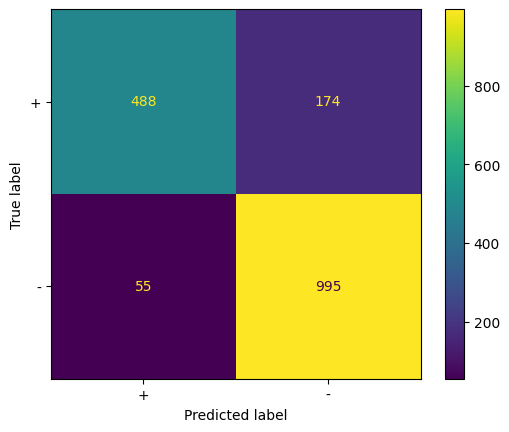

In [60]:
cm_disp=ConfusionMatrixDisplay(cm,display_labels=['+','-'])
cm_disp.plot()

In [61]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         neg       0.90      0.74      0.81       662
         pos       0.85      0.95      0.90      1050

    accuracy                           0.87      1712
   macro avg       0.87      0.84      0.85      1712
weighted avg       0.87      0.87      0.86      1712



In [62]:
import pickle
with open('model_mn.pkl', 'wb') as file:
    pickle.dump(mn, file)
with open('count_vectorizer.pkl', 'wb') as file:
    pickle.dump(cv, file)